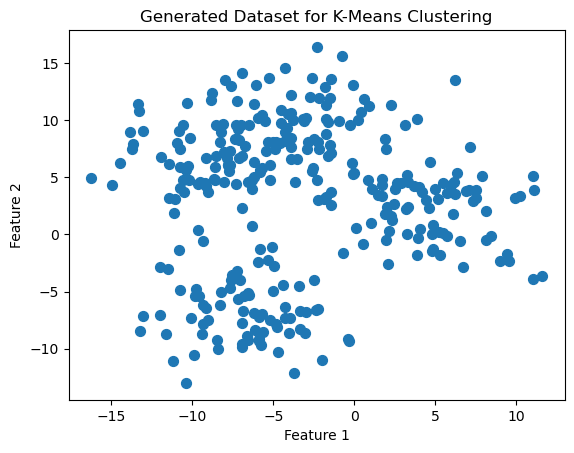

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Parameters
n_samples = 300
n_features = 2
centers = 4

# Generate data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=3, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init = 10, n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

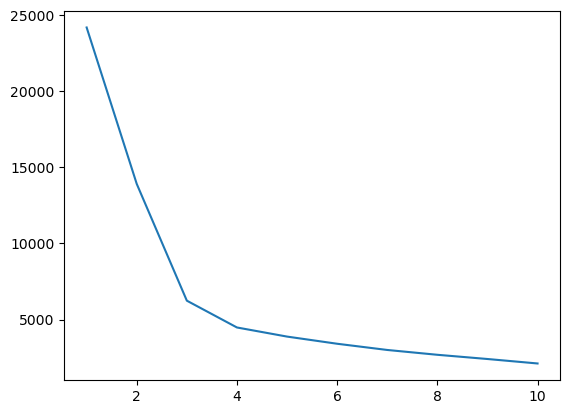

In [4]:
plt.plot(range(1,11),wcss)

In [5]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil.append(silhouette_avg)

C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

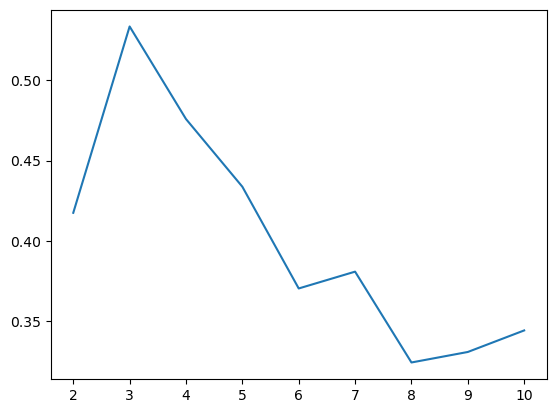

In [6]:
plt.plot(range(2,11),sil)

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_init = 10, n_clusters = 3, verbose=100)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 16937203.667473663.
Iteration 1, inertia 11230880.756028201.
Iteration 2, inertia 11011438.796163587.
Converged at iteration 2: center shift 0.0012256811094314545 within tolerance 0.003287510832384642.
Initialization complete
Iteration 0, inertia 18670434.72738033.
Iteration 1, inertia 9910626.778369969.
Iteration 2, inertia 9499070.89581674.
Iteration 3, inertia 8924862.5630571.
Iteration 4, inertia 8923600.118667688.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 17497039.71060231.
Iteration 1, inertia 9532738.654162584.
Iteration 2, inertia 9525590.668992888.
Converged at iteration 2: center shift 1.5604410796026713e-07 within tolerance 0.003287510832384642.
Initialization complete
Iteration 0, inertia 15927576.213363359.
Iteration 1, inertia 11011415.341638701.
Converged at iteration 1: center shift 0.00019665716515464296 within tolerance 0.003287510832384642.
Initialization complete
Iteration 

KMeans(n_clusters=3, n_init=10, verbose=100)

C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

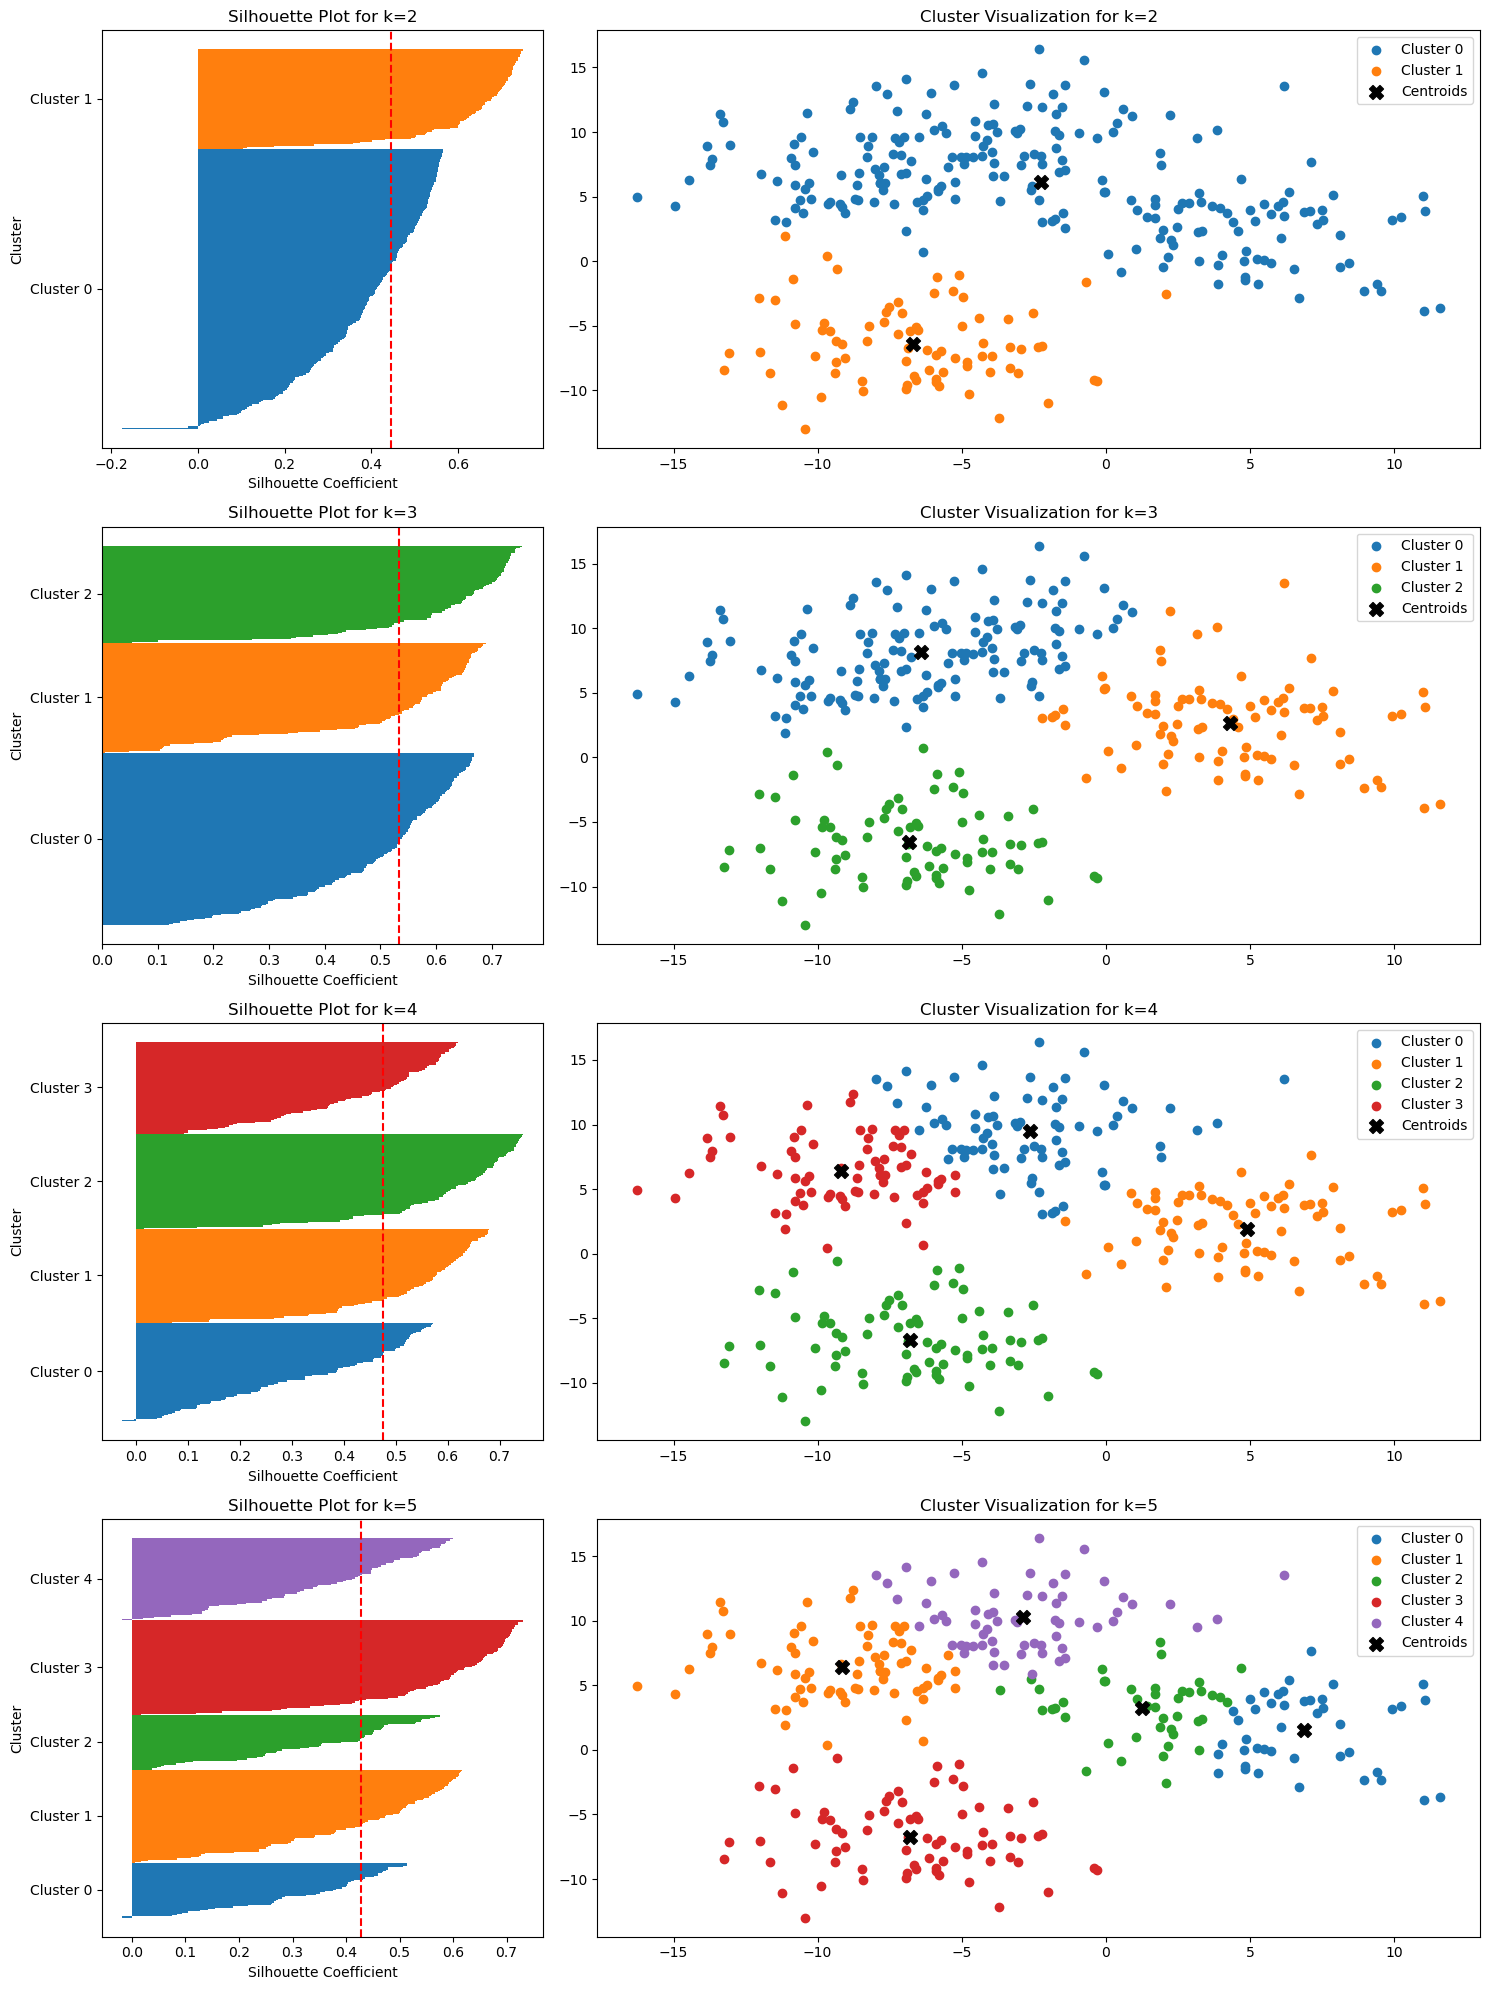

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np


# Setting up the subplot grid
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 2])

# Creating silhouette and scatter plots for different values of k (2, 3, 4, 5)
for i, k in enumerate([2, 3, 4, 5]):
    # Clustering with k-means
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)

    # Silhouette values
    silhouette_vals = silhouette_samples(X, cluster_labels)
    avg_score = silhouette_score(X, cluster_labels)

    # Silhouette plot
    ax1 = plt.subplot(gs[i, 0])
    y_lower, y_upper = 0, 0
    yticks = []
    for j, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)
    ax1.axvline(avg_score, color="red", linestyle="--")
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([f'Cluster {x}' for x in np.unique(cluster_labels)])
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Silhouette Coefficient')
    ax1.set_title(f'Silhouette Plot for k={k}')

    # Scatter plot
    ax2 = plt.subplot(gs[i, 1])
    for j in np.unique(cluster_labels):
        ax2.scatter(X[cluster_labels == j, 0], X[cluster_labels == j, 1], label=f'Cluster {j}')
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
    ax2.set_title(f'Cluster Visualization for k={k}')
    ax2.legend()

plt.tight_layout()
plt.show()


In [9]:
y_kmeans = kmeans.fit_predict(X)

C:\Users\praye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [10]:
y_kmeans

array([1, 1, 2, 3, 1, 3, 0, 3, 4, 2, 4, 0, 2, 1, 1, 4, 1, 2, 4, 4, 0, 4,
       3, 1, 4, 4, 1, 3, 3, 2, 1, 2, 1, 0, 1, 4, 1, 3, 1, 3, 0, 4, 1, 3,
       2, 4, 1, 2, 1, 0, 3, 1, 3, 2, 3, 4, 1, 0, 0, 4, 1, 0, 0, 4, 3, 3,
       3, 3, 3, 4, 3, 3, 1, 0, 2, 1, 3, 3, 4, 3, 4, 4, 1, 4, 3, 1, 4, 0,
       0, 2, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 2, 0, 0, 2, 4, 2, 2, 4, 3, 1,
       0, 4, 4, 2, 4, 0, 1, 3, 1, 3, 3, 3, 2, 1, 3, 1, 1, 4, 1, 3, 0, 1,
       2, 1, 1, 0, 0, 1, 4, 3, 4, 0, 2, 4, 2, 2, 0, 0, 3, 4, 1, 4, 0, 3,
       4, 2, 3, 1, 1, 2, 1, 1, 3, 1, 0, 1, 3, 4, 4, 2, 4, 4, 3, 2, 2, 3,
       3, 4, 0, 3, 1, 4, 1, 0, 0, 1, 3, 2, 3, 2, 3, 3, 3, 1, 2, 3, 3, 0,
       2, 1, 4, 4, 3, 2, 4, 3, 3, 1, 3, 4, 4, 3, 3, 2, 1, 3, 4, 1, 1, 1,
       1, 3, 1, 3, 2, 2, 1, 4, 2, 0, 0, 4, 4, 3, 0, 3, 1, 0, 4, 1, 4, 3,
       3, 0, 4, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 4, 1, 4, 2, 4, 1, 1,
       3, 2, 3, 0, 0, 4, 4, 3, 2, 0, 1, 1, 3, 1, 4, 2, 2, 0, 0, 3, 1, 0,
       3, 0, 2, 3, 4, 3, 0, 4, 1, 4, 2, 1, 1, 4])

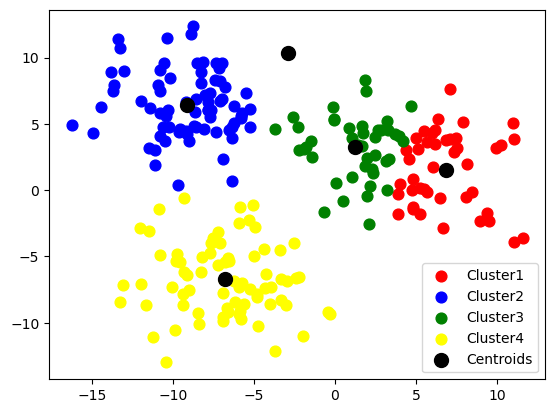

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

plt.show()

# Assignment

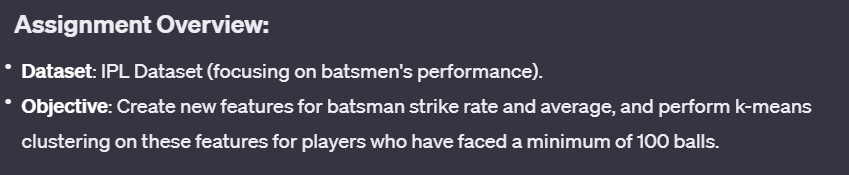

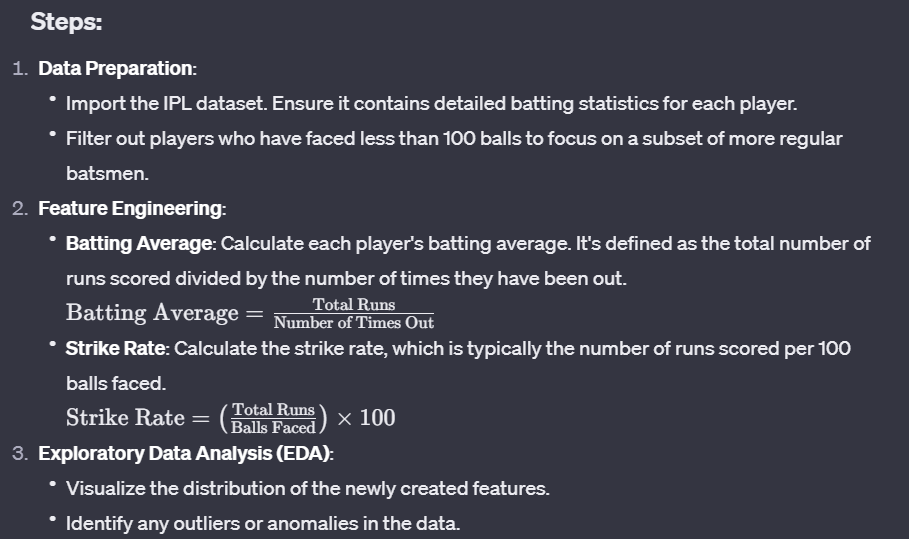

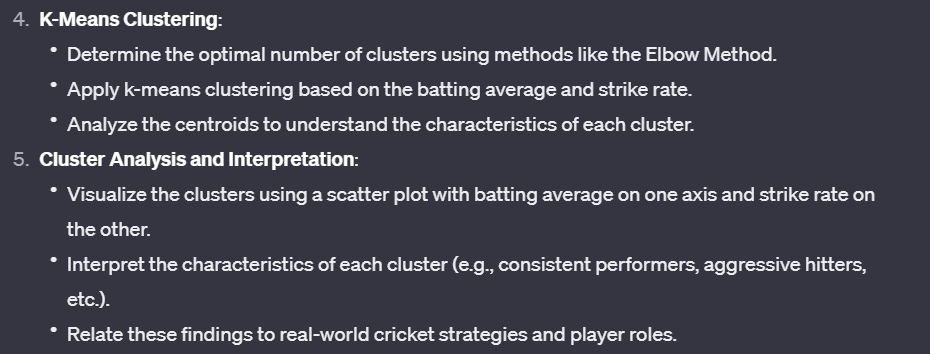

In [13]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import time

# Generating synthetic data for clustering
n_samples = 100000
n_features = 10
n_clusters = 5
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)

# Function to measure time taken by KMeans using different algorithms
def measure_kmeans_time(algorithm):
    kmeans = KMeans(n_clusters=n_clusters, algorithm=algorithm, random_state=0)
    start_time = time.time()
    kmeans.fit(X)
    return time.time() - start_time

# Measuring time for Lloyd's algorithm
lloyd_time = measure_kmeans_time('lloyd')

# Measuring time for Elkan's algorithm
elkan_time = measure_kmeans_time('elkan')

lloyd_time, elkan_time



(0.06180453300476074, 0.05684781074523926)

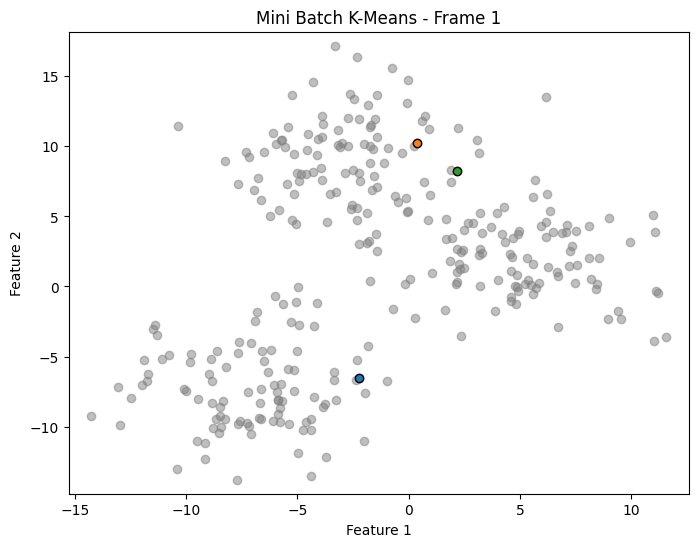

100/100

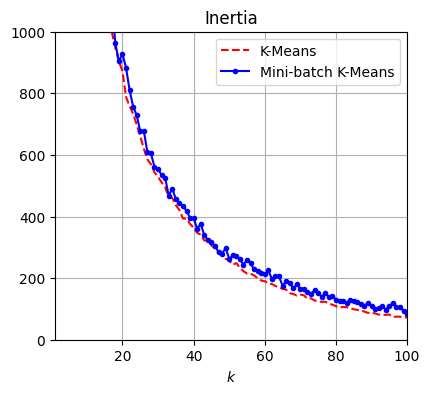